In [1]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import shutil

In [2]:
img_faulty_t = imread("../data/processed/Mathiesen-single-pages/top/8013620831-0035.jpg-t.jpg")
img_allowed_t = imread("../data/processed/Mathiesen-single-pages/top/8013620831-0816.jpg-t.jpg")

In [3]:
img_faulty_b = imread("../data/processed/Mathiesen-single-pages/bottom/8013620831-0036.jpg-b.jpg")
img_allowed_b = imread("../data/processed/Mathiesen-single-pages/bottom/8013620831-0650.jpg-b.jpg")

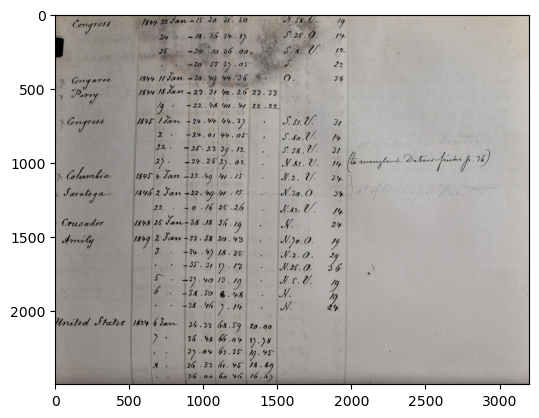

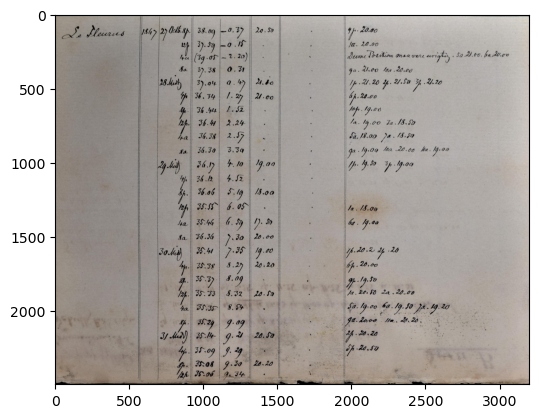

In [4]:
plt.imshow(img_faulty_t, cmap='gray')
plt.show()
plt.imshow(img_allowed_t, cmap='gray')
plt.show()

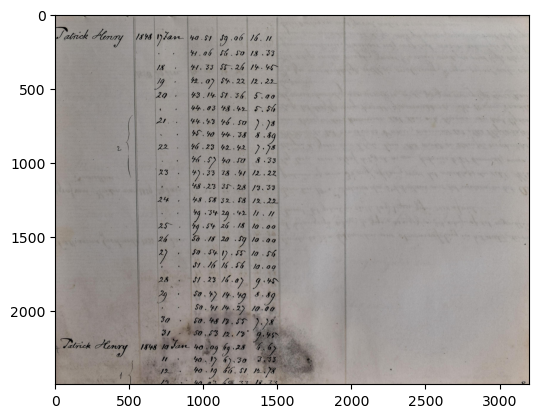

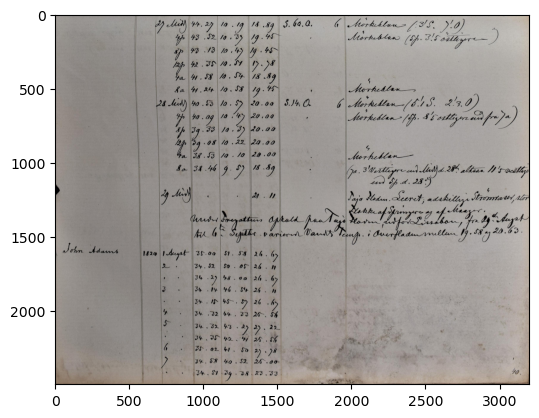

In [5]:
plt.imshow(img_faulty_b, cmap='gray')
plt.show()
plt.imshow(img_allowed_b, cmap='gray')
plt.show()

In [6]:
def preprocess(img, min=25):
    _, img = cv2.threshold(img, min, 255, cv2.THRESH_BINARY)
    img = img / 255.0
    return img
    
img_faulty_preprocessed_t = preprocess(img_faulty_t)
img_allowed_preprocessed_t = preprocess(img_allowed_t)

img_faulty_preprocessed_b = preprocess(img_faulty_b)
img_allowed_preprocessed_b = preprocess(img_allowed_b)

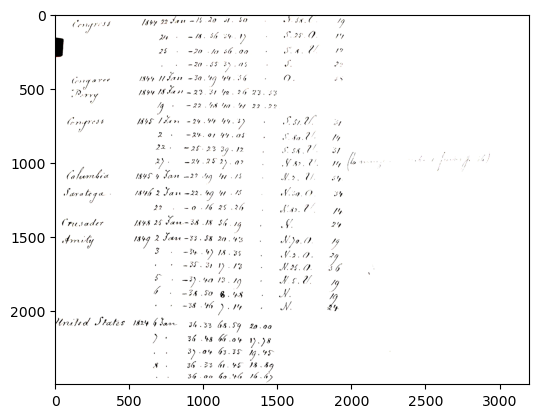

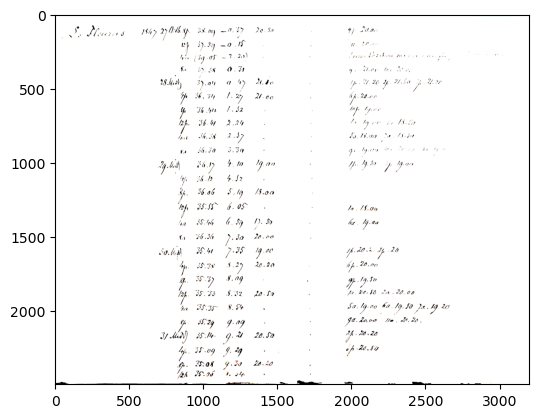

In [7]:
plt.imshow(img_faulty_preprocessed_t, cmap='gray')
plt.show()

plt.imshow(img_allowed_preprocessed_t, cmap='gray')
plt.show()

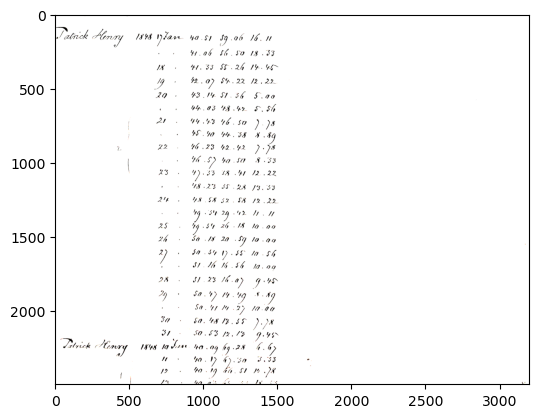

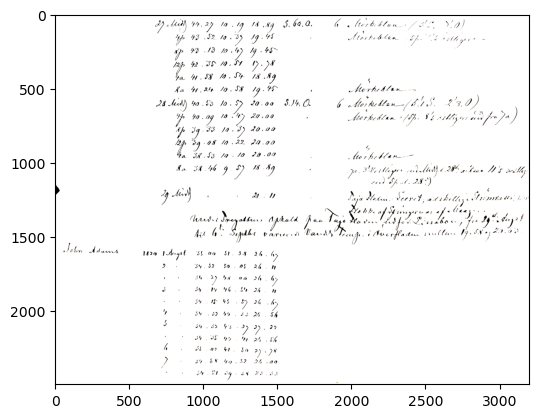

In [8]:
plt.imshow(img_faulty_preprocessed_b, cmap='gray')
plt.show()

plt.imshow(img_allowed_preprocessed_b, cmap='gray')
plt.show()

In [9]:
def select_images_t(img):
    one_row = img[20, :, 0]
    return (0 not in one_row)


In [10]:
def select_images_b(img, ):
    height = img.shape[0]
    one_row = img[height-20, :, 0]
    return (0 not in one_row)

In [11]:
print("top images:")
print("allowed:", select_images_t(img_allowed_preprocessed_t))
print("faulty:", select_images_t(img_faulty_preprocessed_t))

print("bottom images:")
print("allowed:", select_images_b(img_allowed_preprocessed_b))
print("faulty:", select_images_b(img_faulty_preprocessed_b))

top images:
allowed: True
faulty: False
bottom images:
allowed: True
faulty: False


In [12]:
# main pipeline for sorting
def sort_imgs(input_folder, train, test):
    os.makedirs(train, exist_ok=True)
    os.makedirs(test, exist_ok=True)

    for filename in os.listdir(input_folder):
        file_path = os.path.join(input_folder, filename)
        img = imread(file_path)
        if "-t" in filename:
            if select_images_t(img):  # then training
                shutil.copy(file_path, train)
            else: 
                shutil.copy(file_path, test)
        elif "-b" in filename:
            if select_images_b(img):
                shutil.copy(file_path, train)
            else: 
                shutil.copy(file_path, test)




In [13]:
#inputs
top = "/Users/oscar/Documents/mgr-train/data/processed/Mathiesen-single-pages/top"
bottom = "../data/processed/Mathiesen-single-pages/bottom"

#outputs
training_t = "../data/processed/Mathiesen-single-pages/training/top"
testing_t = "../data/processed/Mathiesen-single-pages/testing/top" 
training_b = "../data/processed/Mathiesen-single-pages/training/bottom"
testing_b = "../data/processed/Mathiesen-single-pages/testing/bottom" 

sort_imgs(top, training_t, testing_t)
sort_imgs(bottom, training_b, testing_b)

In [14]:
select_images(img_faulty_preprocessed)
select_images(img_allowed_preprocessed)

NameError: name 'select_images' is not defined